In [1]:
import cv2
import numpy as np
from utils import MeanShift
import matplotlib.pyplot as plt

In [2]:
# Preprocessing

path: str = r".\Datasets\Question-3\peppers.png"

image: np.ndarray = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("Loaded Image Shape (H, W, C): ", image.shape)

processed: np.ndarray = np.zeros((image.shape[0]*image.shape[1], 5))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        processed[i*image.shape[1] + j] = np.array([*image[i, j], i, j])
    
processed /= np.amax(processed, axis=0)
print("Processed Image Shape: ", processed.shape)

Loaded Image Shape (H, W, C):  (384, 512, 3)
Processed Image Shape:  (196608, 5)


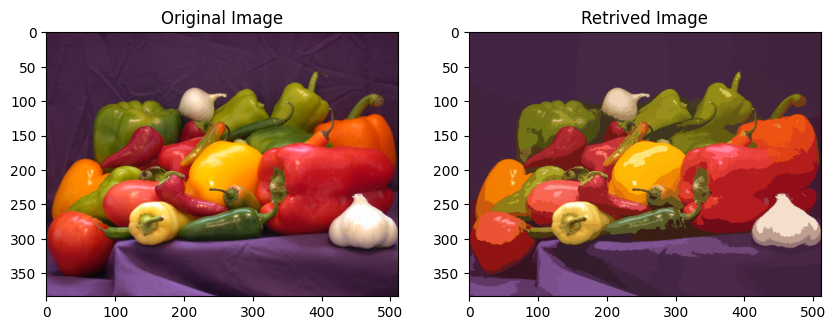

In [3]:
meanshift = MeanShift(bandwidth=0.25)
meanshift.fit(processed)
out = meanshift.train()

# Reconstruct the retrived image
result = np.zeros(image.shape)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        x = out[i*image.shape[1] + j]
        result[i, j] = meanshift.centroids[np.argmin(np.linalg.norm(meanshift.centroids - x, axis=1))][:3]

# Plot the orignal vs retrived image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(result)
ax[1].set_title("Retrived Image")
plt.show()